## IS602 | Adv. Programming Techniques | Fall 2015
### Final Project
#### James Hamski | james.hamski@spsmail.cuny.edu

If you are under 40 years old, you expect your income to grow more in the coming year than older age groups. The median point prediction has ranged from a low in June of 2013 of 2.78% to a high of 4.64% in June of 2015. I find this survey fascinating. What dollar amount does 4.64% equate to? Who doesn’t think they’re going to get a raise in the next year? What economic and demographic factors are important to this survey?

### 1. Configuring Analysis Environment

*Module Imports*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Data Import


Data for this project comes from the Federal Reserve Bank of New York’s (FRBNY) Survey of Consumer Expectations. 

These data are available in Excel format from the FRBNY's website. Pandas does allow for reading in Excel files directly from a URL using read_excel(). However, since these files are pretty large, I downloaded them to the AWS instance to speed future imports. This means using a Linux shell command via the Notebook by preceeding it with !. 

While I didn't precisely time it, the 60MB 'microdata' file download seems to be significantly faster on the AWS instance compared to downloading via 

In [2]:
!rm FRBNY-SCE-Data.xls?version=2.1.3.9
!rm FRBNY-SCE-Public-Microdata-Complete.xlsx

In [3]:
!ls -lh

total 36K
-rw-rw-r-- 1 ubuntu ubuntu 11K Dec 18 21:38 IS602_FinalProject_JHamski.ipynb
-rw-rw-r-- 1 ubuntu ubuntu 118 Nov 28 20:11 README.md
-rw-rw-r-- 1 ubuntu ubuntu 18K Dec  6 16:23 test.png


In [4]:
!wget https://www.newyorkfed.org/medialibrary/Interactives/sce/sce/downloads/data/FRBNY-SCE-Public-Microdata-Complete.xlsx
!wget https://www.newyorkfed.org/medialibrary/interactives/sce/sce/downloads/data/FRBNY-SCE-Data.xls?version=2.1.3.9

--2015-12-19 14:19:37--  https://www.newyorkfed.org/medialibrary/Interactives/sce/sce/downloads/data/FRBNY-SCE-Public-Microdata-Complete.xlsx
Resolving www.newyorkfed.org (www.newyorkfed.org)... 23.41.189.72, 2600:1409:a:382::5a2, 2600:1409:a:398::5a2
Connecting to www.newyorkfed.org (www.newyorkfed.org)|23.41.189.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26090094 (25M) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘FRBNY-SCE-Public-Microdata-Complete.xlsx’

100%[======================================>] 26,090,094  13.6MB/s   in 1.8s   

2015-12-19 14:19:39 (13.6 MB/s) - ‘FRBNY-SCE-Public-Microdata-Complete.xlsx’ saved [26090094/26090094]

--2015-12-19 14:19:39--  https://www.newyorkfed.org/medialibrary/interactives/sce/sce/downloads/data/FRBNY-SCE-Data.xls?version=2.1.3.9
Resolving www.newyorkfed.org (www.newyorkfed.org)... 23.41.189.72, 2600:1409:a:398::5a2, 2600:1409:a:382::5a2
Connecting to www.newyorkfed.org (www.

In [5]:
#confirm the files appear in the active directory
!ls -lh

total 26M
-rw-rw-r-- 1 ubuntu ubuntu 263K Dec  2 17:38 FRBNY-SCE-Data.xls?version=2.1.3.9
-rw-rw-r-- 1 ubuntu ubuntu  25M Dec 11 21:27 FRBNY-SCE-Public-Microdata-Complete.xlsx
-rw-rw-r-- 1 ubuntu ubuntu  11K Dec 18 21:38 IS602_FinalProject_JHamski.ipynb
-rw-rw-r-- 1 ubuntu ubuntu  118 Nov 28 20:11 README.md
-rw-rw-r-- 1 ubuntu ubuntu  18K Dec  6 16:23 test.png


In [6]:
data_excel_1 = 'FRBNY-SCE-Data.xls?version=2.1.3.9'
#headers1 = ['month', 'median_exp_growth', '25th_exp_growth', '75th_exp_growth', 'median_point_prediction']
data_results = pd.read_excel(data_excel_1, 'Earnings growth', header=3, skip_rows=4, parse_dates=True, index_col=None)
data_results_demo = pd.read_excel(data_excel_1, 'Earnings growth Demo', header=3, skip_rows=4, index_col=None)

In [7]:
data_excel_2 = 'FRBNY-SCE-Public-Microdata-Complete.xlsx'
microdata = pd.read_excel(data_excel_2, 'Data', header=1, skip_rows=2)

### 3. Data Cleaning and Formatting

First, I reconfigure the data_results dataframe object. This shows summary statistics for the expected income growth survey results (median, 2th and 75th, median point prediction). 

In [8]:
data_results.reset_index(level=0, inplace=True)
data_results.rename(columns = {'index':'Month'}, inplace = True)
data_results['Month'] = pd.to_datetime(data_results['Month'], errors='coerce', format='%Y%m')
data_results.head()

,Month,Median expected earnings growth,25th Percentile expected earnings growth,75th Percentile expected earnings growth,Median point prediction
0,2013-06-01,2.00,0.95,3.53,2.28
1,2013-07-01,2.00,1.00,3.02,2.38
2,2013-08-01,2.07,1.00,3.55,2.39
3,2013-09-01,2.00,1.00,3.52,2.20
4,2013-10-01,1.90,1.00,3.61,2.15


In [10]:
data_results_demo.reset_index(level=0, inplace=True)
data_results_demo.rename(columns = {'index':'Month'}, inplace = True)
data_results_demo['Month'] = pd.to_datetime(data_results_demo['Month'], errors='coerce', format='%Y%m')
data_results_demo.head()

,Month,Age Under 40,Age 40-60,Age Over 60,Education High School or Less,Education Some College,Education BA or Higher,Income under 50k,Income 50-100k,Income Over 100k,Numeracy Low,Numeracy High,Region West,Region Midwest,Region South,Region Northeast
0,2013-06-01,3.00,1.46,1.29,1.54,1.71,2.31,1.28,2.11,2.28,2.00,2.00,1.55,2.50,1.54,1.95
1,2013-07-01,2.62,1.45,1.29,2.00,1.27,2.42,1.55,1.63,2.00,1.00,2.19,1.29,2.45,1.40,2.00
2,2013-08-01,2.91,1.94,1.29,2.00,2.15,2.38,2.03,2.00,2.45,2.00,2.19,2.03,2.37,2.15,2.00
3,2013-09-01,2.50,2.00,1.46,2.00,2.00,2.45,1.61,2.00,2.59,1.61,2.00,2.00,1.69,2.18,1.39
4,2013-10-01,2.45,1.60,1.60,1.55,1.46,2.42,1.46,1.58,2.50,1.55,2.00,2.25,1.87,1.75,1.75


In [11]:
microdata['date'] = pd.to_datetime(microdata['date'], errors='coerce', format='%Y%m')
microdata.rename(columns = {'date':'Month'}, inplace = True)
microdata.head()

,Month,userid,tenure,weight,Q1,Q2,Q3,Q4new,Q5new,Q6new,...,Q47,D1,D3,DSAME,_AGE_CAT,_NUM_CAT,_REGION_CAT,_EDU_CAT,_HH_INC_CAT,_HH_INC_CAT.1
0,2013-06-01,70000220,6,16.327999,3,3,50,20,10,15,...,3,1,2,NaN,Under 40,High,West,Some College,Under 50k,Under 50k
1,2013-06-01,70000224,7,0.228000,4,4,25,10,25,75,...,11,1,2,NaN,Over 60,High,Midwest,College,Over 100k,Over 100k
2,2013-06-01,70000234,6,4.066000,4,3,3,9,20,20,...,9,1,2,NaN,40 to 60,High,West,Some College,Over 100k,Over 100k
3,2013-06-01,70000238,6,3.035000,3,3,0,10,5,70,...,4,1,2,NaN,Over 60,Low,West,Some College,Under 50k,Under 50k
4,2013-07-01,70000238,7,1.867000,3,3,50,90,0,60,...,5,1,2,NaN,Over 60,Low,West,Some College,Under 50k,Under 50k


### 4. Exploratory Data Analysis

The FRBNY asks survey respondents what they expect their income to be in one year using two methods - first, by asking them to place it in a bucket (i.e. "2% to 4%") or for an open-ended point prediction:

*Median expected earnings growth  
Respondents who report working full time, part time, being temporarily laid off or on sick leave are
asked for the percent chance that 12 months from now their earnings, before taxes and deductions,
will have increased (decreased) by 12% or more; by 8% to 12%; by 4% to 8%; by 2% to 4%; by 0% to
2% (assuming that 12 months from now they are working in the exact same job at the same place
they currently work, and working the exact same number of hours). A generalized beta distribution is
fitted to the responses of each survey participant and the mean of this distribution is calculated. We
call this mean the respondent’s “expected earnings growth”. Variable 1 is the median across all
respondents of their expected earnings growth rates.* 

*Median point prediction  
Respondents who report working full time, part time, being temporarily laid off or on sick leave are
asked by how much they expect their earnings to have increased/decreased 12 months from now
(assuming that 12 months from now they are working in the exact same job at the same place they
currently work, and working the exact same number of hours). This is a point prediction (a singlevalue
forecast). Variable 3 is the median across all respondents of their point predictions. Given that
almost all respondents, while asked about continuous variables, provide integer responses, throughout in computing medians based on point predictions we treat the responses as rounded
grouped data and compute linearly interpolated medians.*

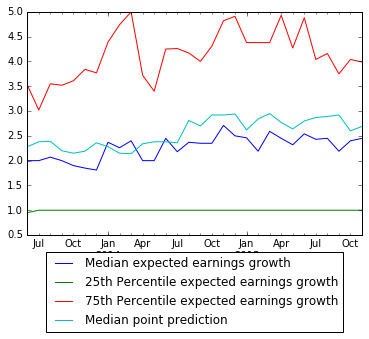

In [49]:
results = data_results.set_index(keys='Month', drop=True)
results.plot().legend(loc='upper center', bbox_to_anchor=(0.5, -0.05))

The 25th Percentile expected earnings growth is 1.0 for all months surveyed except for the first month. I'm not entirely certain why this is the case - there must be a constraint on the survey response.

Viewing histograms of the median and median point prediction shows that over the period from June 2013 through November 2015, asking someone an open ended "How much do you anticipate your income to increase by?" and recording the numeric response results similarly bounded responses compared to if they are given a pecent range options. 

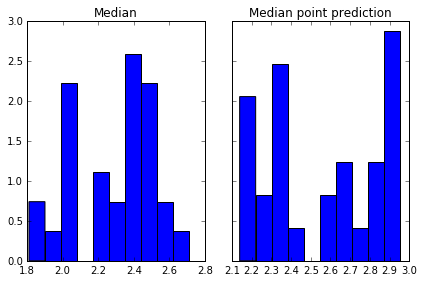

In [53]:
n_bins = 10

fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True)
ax0, ax1 = axes.flat

ax0.hist(data_results['Median expected earnings growth'], n_bins, normed=1, histtype='bar')
ax0.set_title('Median')

ax1.hist(data_results['Median point prediction'], n_bins, normed=1, histtype='bar')
ax1.set_title('Median point prediction')

plt.tight_layout()

plt.show()

One would intuitively expect income growth expectations to vary based on demographic information. An early-career professional with a college degree should expect their income to increase, a late-career respondent with less education should expect their income growth to be lower. The FRBNY survey includes several demographic data categories that allow these assumptions to be tested. 

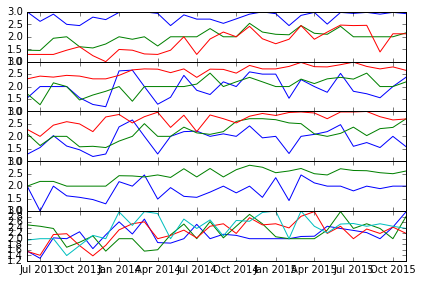

In [98]:
results_demo = data_results_demo.set_index(keys='Month', drop=True)

fig, axes = plt.subplots(nrows=5, ncols=1, sharex=True)
ax0, ax1, ax2, ax3, ax4 = axes.flat

ax0.plot(results_demo.ix[:,0:3])

ax1.plot(results_demo.ix[:,3:6])

ax2.plot(results_demo.ix[:,6:9])

ax3.plot(results_demo.ix[:,9:11])

ax4.plot(results_demo.ix[:,11:15])

plt.tight_layout()

plt.subplots_adjust(hspace = 0.001)

plt.show()

### 5. What sort of dollar-amount increase do respondents expect?

In finance and economics, data presented as a percentage or summary statistic is ubiquitous. This is of course the proper way to deal with data in aggregate. However, economics is all about thinking "on the margin" - the cost or benefit of each additional unit of something isn't constant, it depends on the context of how much you already have. A dollar means much more to the person with just a few dollars to their name compared to someone will thousands in the bank.

So, when a respondent to the FRBNY 

In [27]:
list(microdata.columns.values)

['Month',
 u'userid',
 u'tenure',
 u'weight',
 u'Q1',
 u'Q2',
 u'Q3',
 u'Q4new',
 u'Q5new',
 u'Q6new',
 u'Q8v2',
 u'Q8v2part2',
 u'Q9_mean',
 u'Q9_iqr',
 u'Q9_median',
 u'Q9_probdeflation',
 u'Q9_bin1',
 u'Q9_bin2',
 u'Q9_bin3',
 u'Q9_bin4',
 u'Q9_bin5',
 u'Q9_bin6',
 u'Q9_bin7',
 u'Q9_bin8',
 u'Q9_bin9',
 u'Q9_bin10',
 u'Q9_quant1',
 u'Q9_quant2',
 u'Q9_var',
 u'Q9bv2',
 u'Q9bv2part2',
 u'Q9c_mean',
 u'Q9c_iqr',
 u'Q9c_median',
 u'Q9c_probdeflation',
 u'Q9c_bin1',
 u'Q9c_bin2',
 u'Q9c_bin3',
 u'Q9c_bin4',
 u'Q9c_bin5',
 u'Q9c_bin6',
 u'Q9c_bin7',
 u'Q9c_bin8',
 u'Q9c_bin9',
 u'Q9c_bin10',
 u'Q9c_quant1',
 u'Q9c_quant2',
 u'Q9c_var',
 u'Q10_1',
 u'Q10_2',
 u'Q10_3',
 u'Q10_4',
 u'Q10_5',
 u'Q10_6',
 u'Q10_7',
 u'Q10_8',
 u'Q10_9',
 u'Q10_10',
 u'Q11',
 u'Q12new',
 u'ES1_1',
 u'ES1_2',
 u'ES1_3',
 u'ES1_4',
 u'ES2',
 u'ES3new',
 u'ES4',
 u'ES5',
 u'Q13new',
 u'Q14new',
 u'Q15',
 u'Q16',
 u'Q17new',
 u'Q18new',
 u'Q19',
 u'Q20new',
 u'Q21new',
 u'Q22new',
 u'Q23v2',
 u'Q23v2part2',
 u'Q2

### 6. Do Salary Expectations Vary With Macroeconomic Indicators?

### Postscript

Microeconomic survey analysis is a specialty unto itself that I do not have any particular education or expertise in. The conclusions drawn here are 